In [2]:
import sys, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas_profiling as pp

sys.path.insert(0, os.path.abspath('..'))
from script.functions import *

In [3]:
df = load_and_process('../../data/raw/adult.data')
df
#MANAGED THE IMPORT THANK GOD

,Age,Workclass,Education,Marital Status,Occupation,Race,Sex,Hours/Week,Native Country,Yearly Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


In [4]:
df.describe()
#this shows that the mean age of the people surveyed is 38 and the mean work hours
#per week are regular work hours of 40/week

,Age,Hours/Week
count,30162.000000,30162.000000
mean,38.437902,40.931238
std,13.134665,11.979984
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


In [9]:
#convert processed data into csv and save in data/processed
df.to_csv('../../data/processed/processed1.csv')
#lets make a profile report.
report = pp.ProfileReport(df).to_file('../../data/processed/report.html')

In [6]:
#Let's check the relationship between Age and Education
ageEdu = df.loc[:,['Age', 'Education']]
ageEdu

,Age,Education
0,39,Bachelors
1,50,Bachelors
2,38,HS-grad
3,53,11th
4,28,Bachelors
...,...,...
32556,27,Assoc-acdm
32557,40,HS-grad
32558,58,HS-grad
32559,22,HS-grad


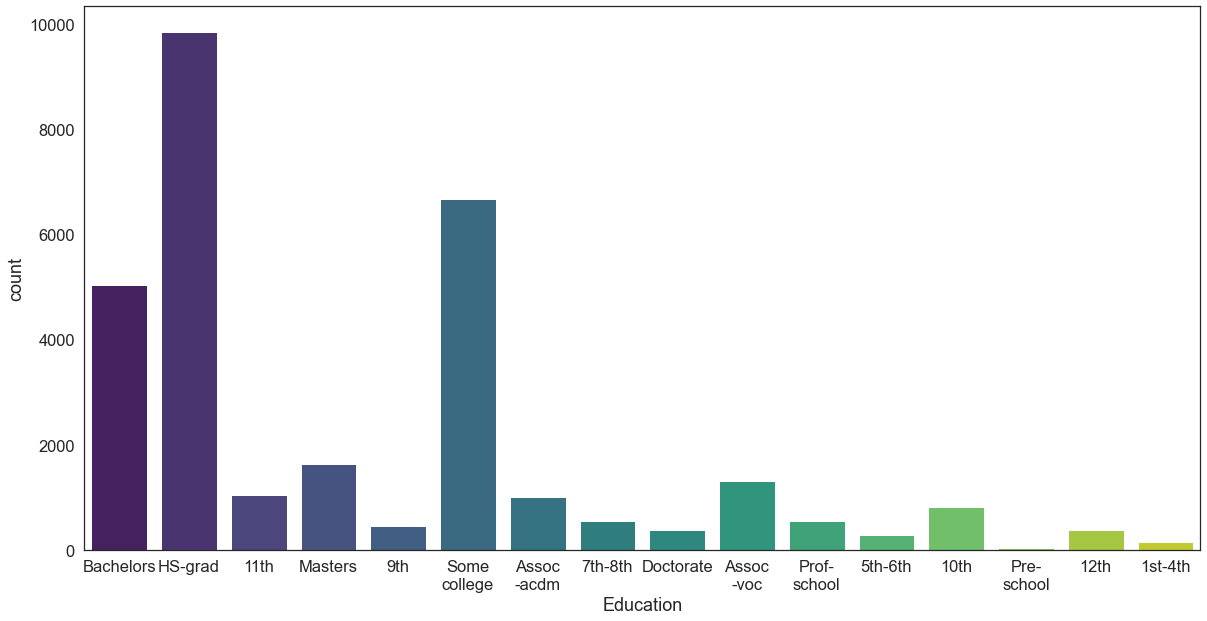

In [8]:
ageEdu.replace({'Some-college': 'Some\ncollege','Prof-school':'Prof-\nschool',
                'Assoc-voc':'Assoc\n-voc','Assoc-acdm':'Assoc\n-acdm',
                'Preschool':'Pre-\nschool'}, inplace = True)
#names didn't fit on graph so I had to change them.
sns.despine()
sns.set(style = 'white', font_scale = 1.5,rc={'figure.figsize':(20,10)})
ageEduGraph = sns.countplot(x = 'Education', data = ageEdu, palette = 'viridis')
#This is to see what education the majority of the people surveyed in this dataset had.
#We can clearly see that mot of the people only joined the workforce with a HS degree
#while others mainly did some college courses or compeleted a full Bachelors

In [67]:
#Replace all row values in Education with new format.
df.replace({'Some-college': 'Some\ncollege','Prof-school':'Prof-\nschool',
                'Assoc-voc':'Assoc\n-voc','Assoc-acdm':'Assoc\n-acdm',
                'Preschool':'Pre-\nschool'}, inplace = True)
df

,Age,Workclass,Education,Marital Status,Occupation,Race,Sex,Hours/Week,Native Country,Yearly Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc\n-acdm,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


[Text(0, 0.5, 'Yearly Income\nAbove 50K Count')]

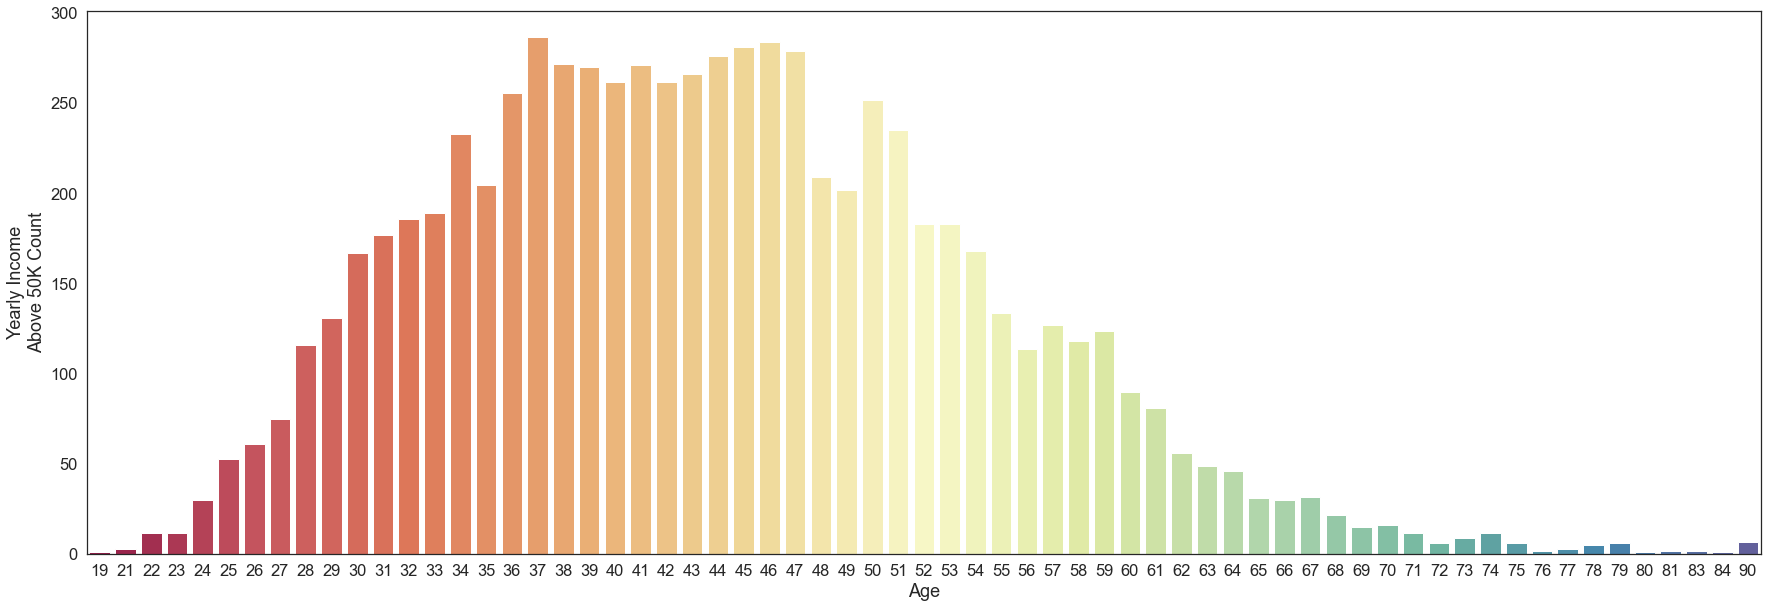

In [153]:
#Let's check the relationship of Age vs Earnings
ageEarn = df.loc[:,['Age', 'Yearly Income']]
ageEarnAbove50k = ageEarn.loc[lambda x: x['Yearly Income'] == '>50K']

#We'll check both Ages that have above and below 50K income
sns.set(style = 'white', font_scale = 1.5,rc={'figure.figsize':(30,10)})
ageEduGraph = sns.countplot(x = 'Age',data = ageEarnAbove50k, palette = 'Spectral')
ageEduGraph.set(ylabel = 'Yearly Income\nAbove 50K Count')

#RESULTS
#This shows that the most amount of people with above 50K yearly income are aged 37 - 47
#which just shows that this is the age when adults become most settled with a good job

[Text(0, 0.5, 'Yearly Income\nBelow 50K Count')]

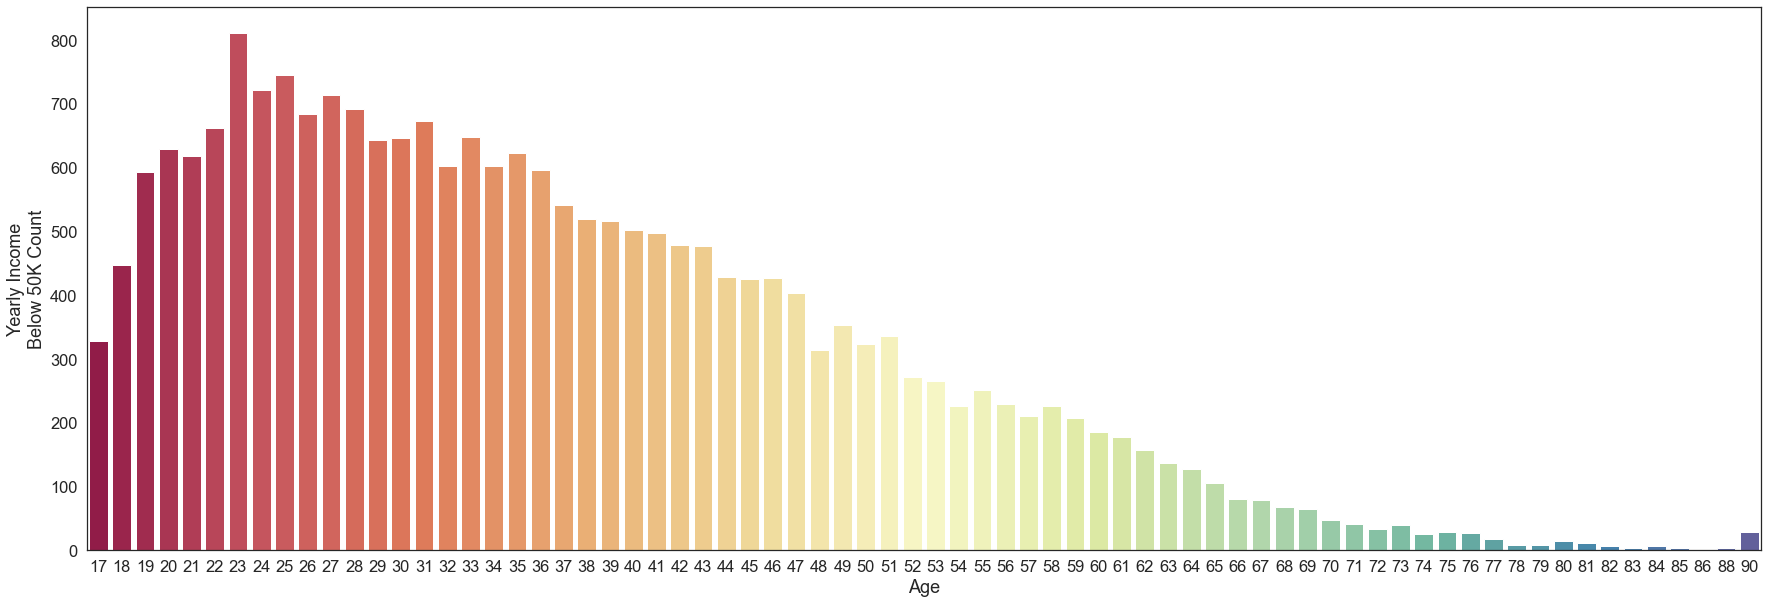

In [154]:
ageEarnBelow50k = ageEarn.loc[lambda x: x['Yearly Income'] == '<=50K']
ageEarnGraph = sns.countplot(x = 'Age', data = ageEarnBelow50k, palette = 'Spectral')
ageEarnGraph.set(ylabel = 'Yearly Income\nBelow 50K Count')
# RESULTS
#This shows that the most amount of people with below 50K yearly income are aged 19 - 36
#which is understandable for young people

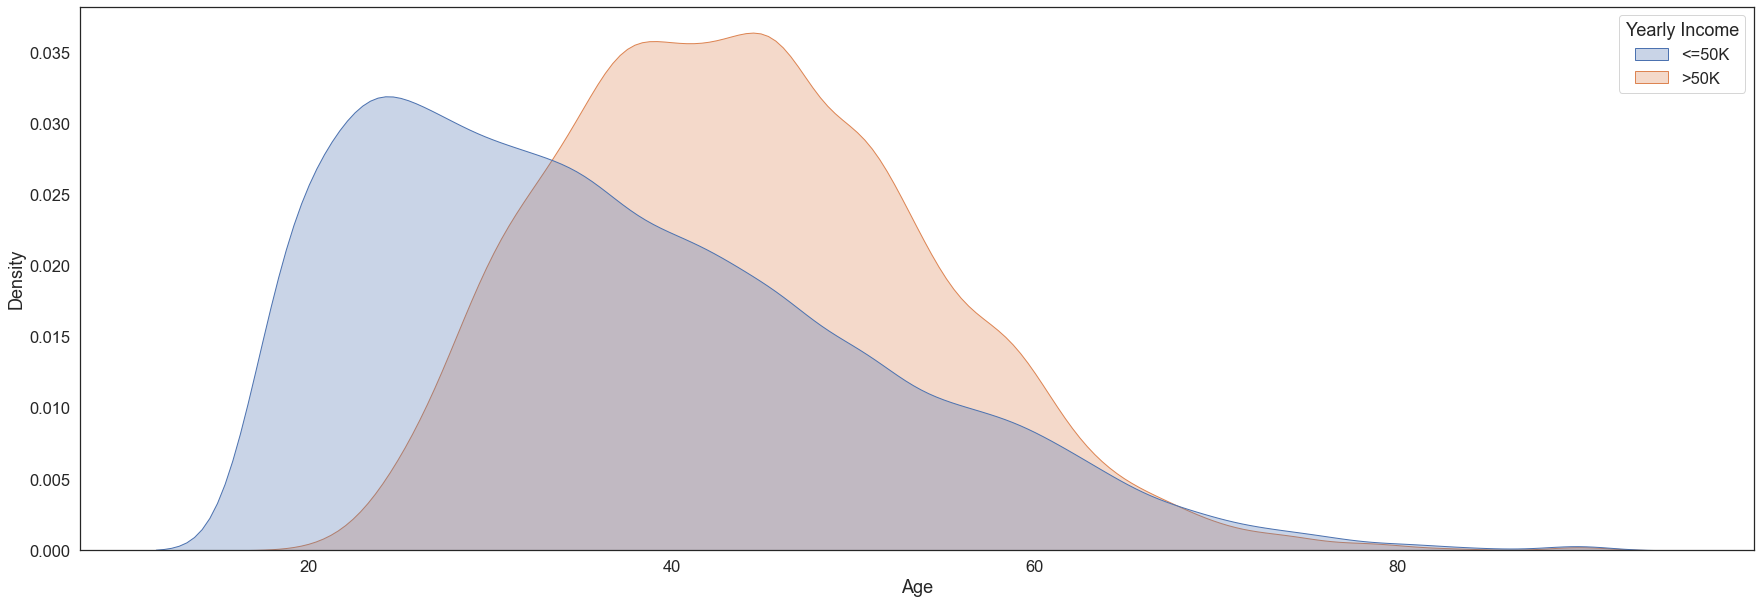

In [155]:
#Let's make a density plot to see the trends in each and where they overlap
ageEarnDenisty = sns.kdeplot(x = 'Age',hue = 'Yearly Income', data = ageEarn,
                             alpha = 0.3, fill = True, common_norm = False)
#RESULTS
#TL;DR Mo money mo money mo money - as we age..to the peak of 47.
#This just shows the immense density of those aged around 40 in the above 50K
#group. It also shows that at around age 25 most is where most people make under 50K
# then they start to climb the above 50K ladder at the peak age of 40. From
#this data it is evident that we make more money as we get older.

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Education VS Salary (Over 50K) Count')]

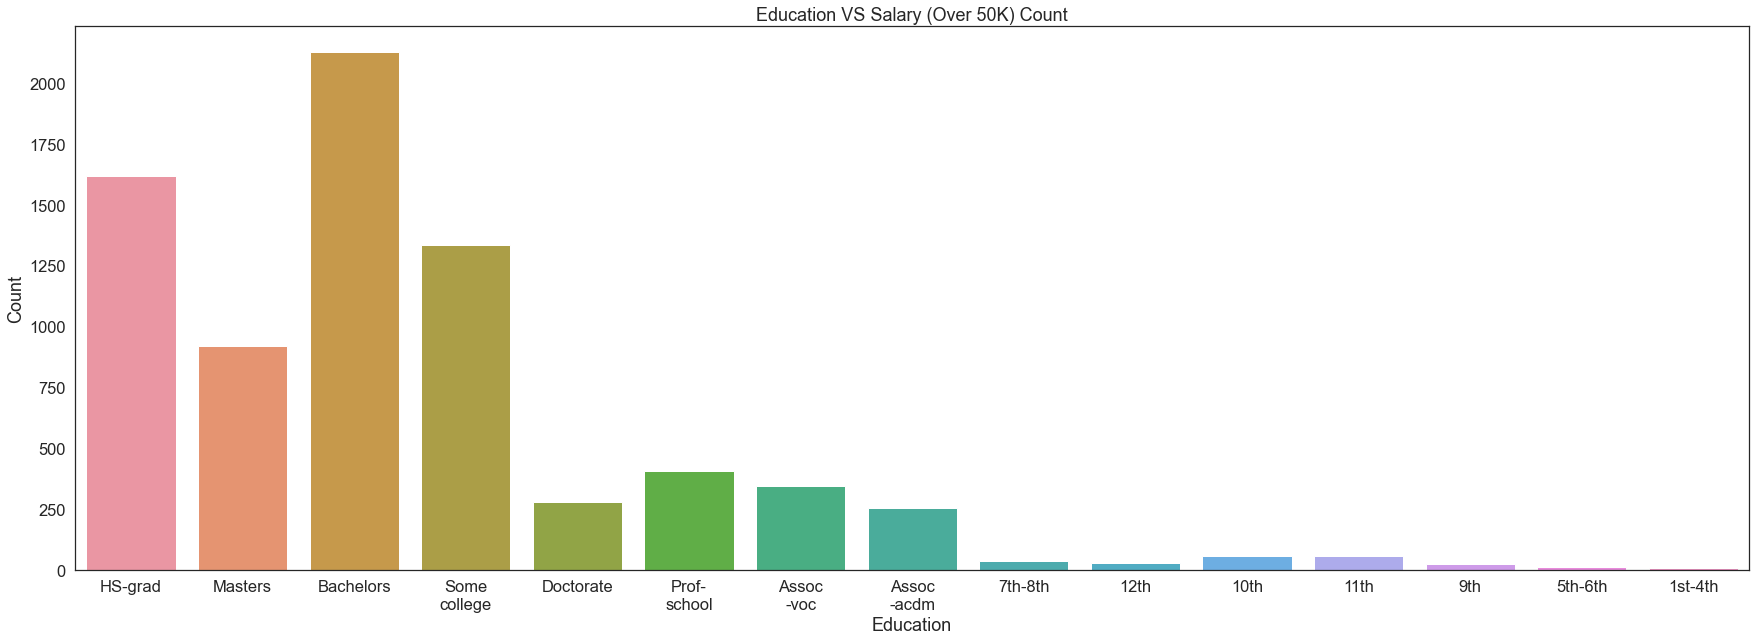

In [156]:
#Time to look at research questions.
#RESEARCH QUESTION 1:
#What is the relationship between education and yearly wages?
eduWageAbove50k = df.loc[lambda x: x['Yearly Income'] == '>50K']
#Let's make a countplot for that.
eduWageGraph = sns.countplot(x = 'Education', data = eduWageAbove50k)
eduWageGraph.set(title = 'Education VS Salary (Over 50K) Count', ylabel = 'Count')
# RESULTS
## TL;DR Bachelor is all you need for a good paying job
#This data shows that most of the people in the Above50k dataset only have their
#Bachelors degree with HS-grad trailing behind. Of course the data becomes skewed
#as we can't directly compare against other educational paths since they are not
#in equal numbers.

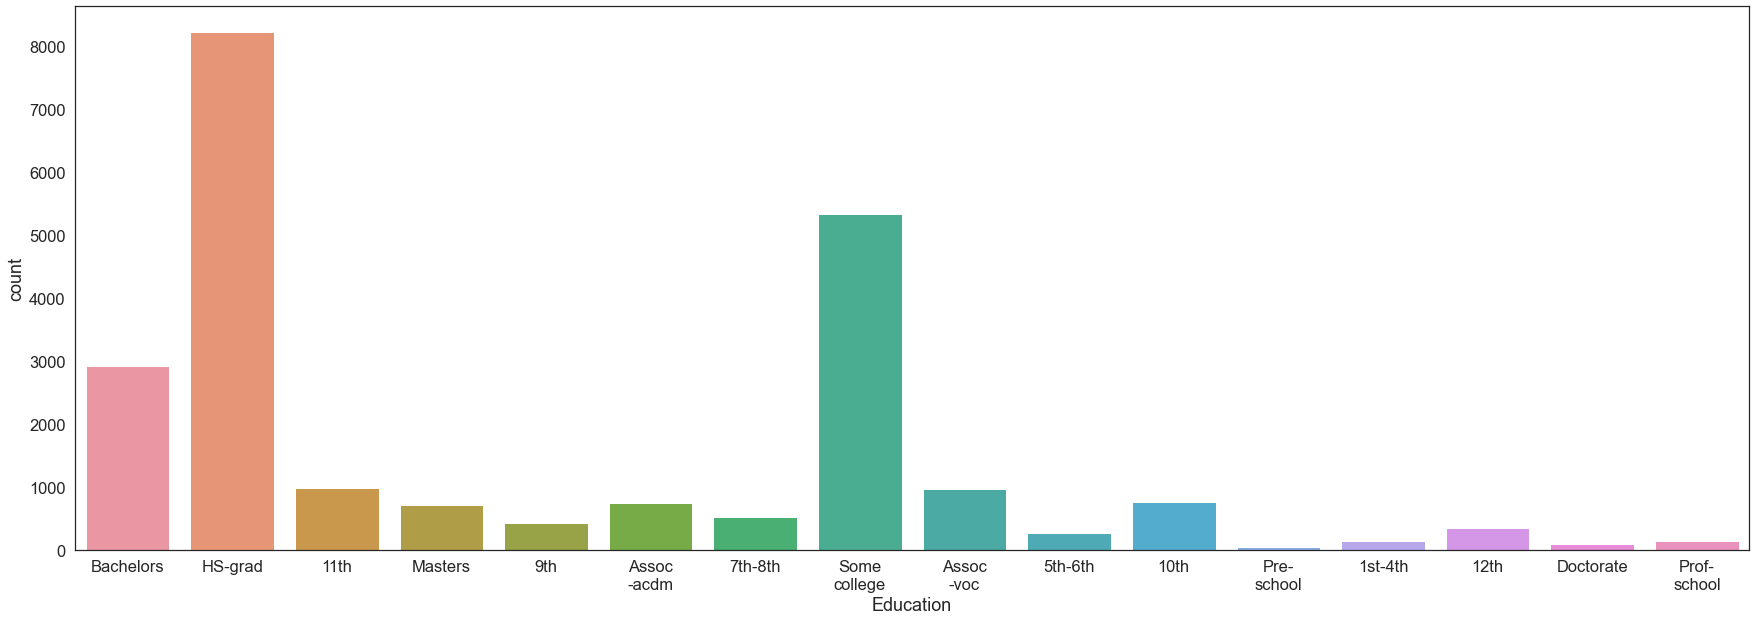

In [157]:
#Now with Below50k
eduWageBelow50k = df.loc[lambda x: x['Yearly Income'] == '<=50K']
#Let's make a countplot for that.
sns.countplot(x = 'Education', data = eduWageBelow50k)
#RESULTS
#TL;DR People fresh out of high school who don't go to further schooling or
#finish post-secondary schooling have lower paying jobs
#This data shows that most of the people with jobs paying below 50k/year are the ones
#with only a HS-grad education with people that have only done some college courses
#as second place. Unless you complete a program at post-secondary or go into trades
#after finishing school, you may make less than 50k/year 

[Text(0, 0.5, 'Count of People with >50K\nEarnings per Occupation'),
 Text(0.5, 1.0, 'Occupation VS Yearly Income')]

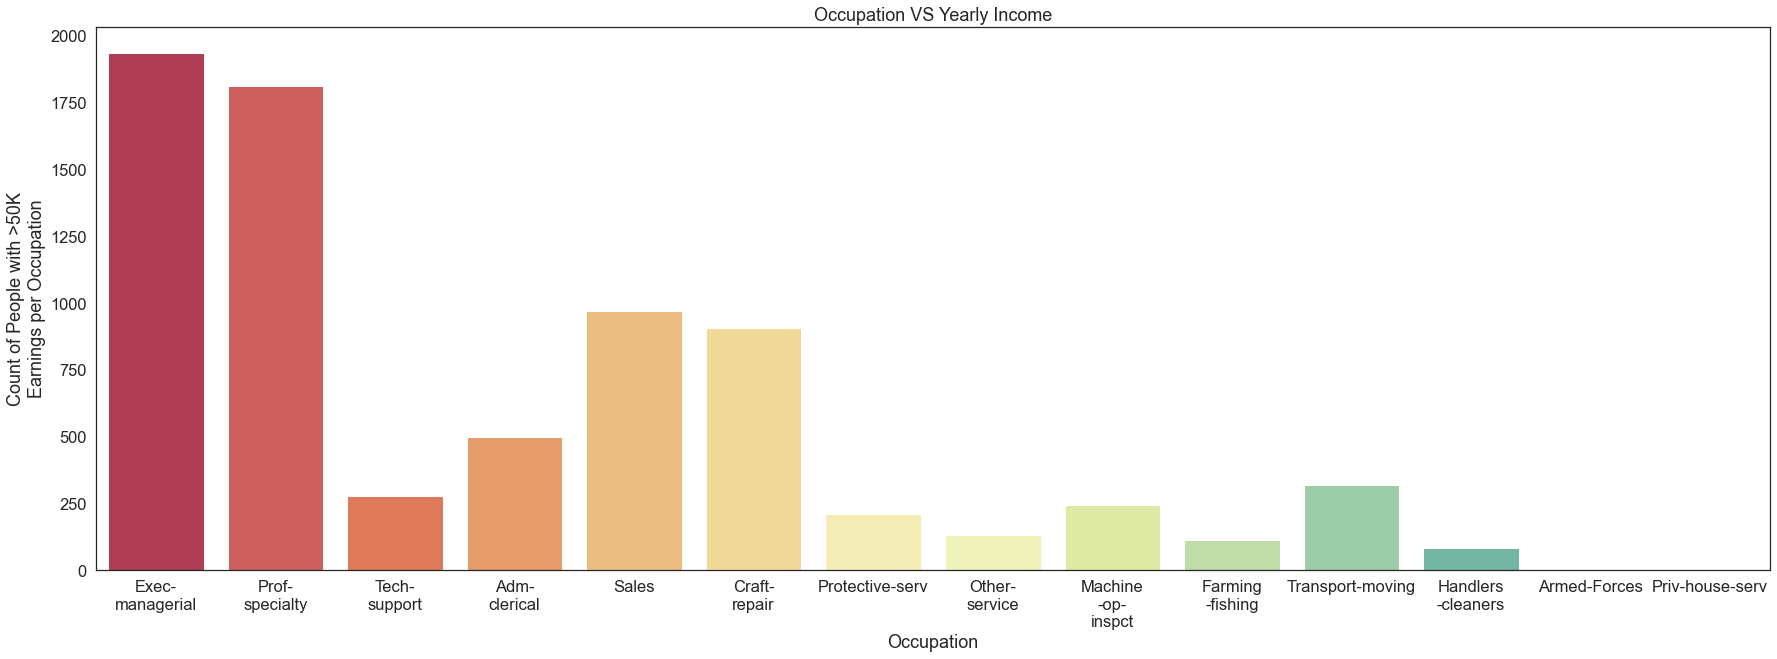

In [179]:
#Since my data is all categorical and a violin, distplot, plot doesn't count occurences of
#categorical data I am limited to a certain amount of graphs.

#Next we're analyzing the relationship between each occupation and its pay
#change row values to fit graph
df.replace({'Adm-clerical':'Adm-\nclerical','Exec-managerial':'Exec-\nmanagerial',
                'Handlers-cleaners':'Handlers\n-cleaners','Tech-support':'Tech-\nsupport',
                'Craft-repair':'Craft-\nrepair','Other-service':'Other-\nservice',
                'Prof-specialty':'Prof-\nspecialty','Machine-op-inspct':'Machine\n-op-\ninspct','Farming-fishing':'Farming\n-fishing'}, inplace = True)
wageInd = df.loc[:,['Occupation', 'Yearly Income']]
wageIndAbove50k = wageInd.loc[lambda x:x['Yearly Income'] == '>50K']
wageIndGraph = sns.countplot(data = wageIndAbove50k, x = 'Occupation', palette = 'Spectral')
wageIndGraph.set(title = 'Occupation VS Yearly Income', ylabel = 'Count of People with >50K\nEarnings per Occupation')
#We can see from this data that no one in armed forces makes above 50K/year
#with the Exec/Managerial and Prof-specialty occupations making the majority of
#the people with wages above 50K/year

[Text(0, 0.5, 'Count of People with <=50K\nEarnings per Occupation'),
 Text(0.5, 1.0, 'Occupation VS Yearly Income')]

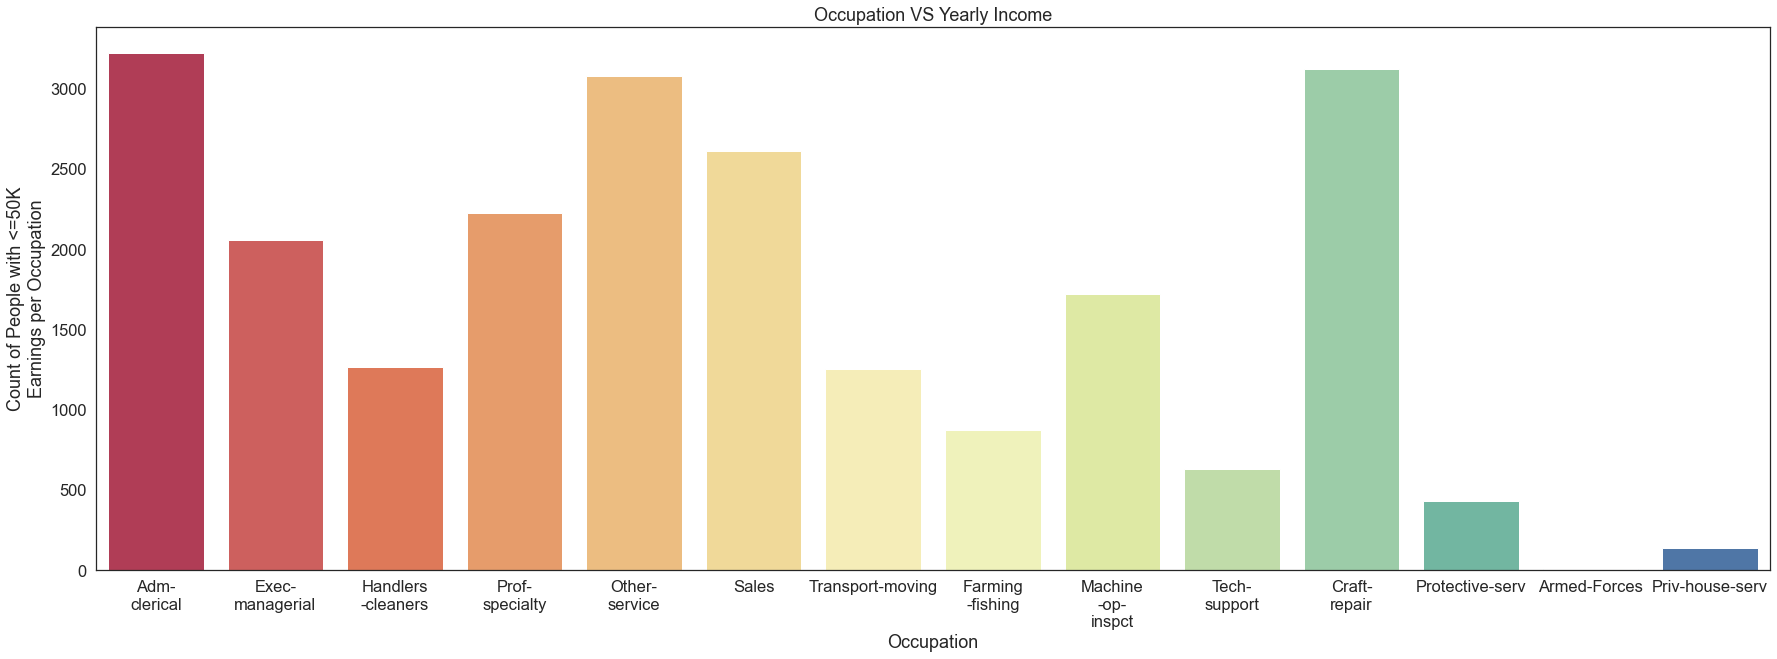

In [178]:
wageIndAbove50k = wageInd.loc[lambda x:x['Yearly Income'] == '<=50K']
wageIndGraph = sns.countplot(data = wageIndAbove50k, x = 'Occupation',palette = 'Spectral')
wageIndGraph.set(title = 'Occupation VS Yearly Income', ylabel = 'Count of People with <=50K\nEarnings per Occupation')
#Now seeing the second half of the data we can observe that no one surveyed worked
#in the armed forces. It also shows that the majority of people making below 50K a year
#strike a 3 way tie between Adm-clerical, Other-services, and Craft-repair jobs.
#Although Exec/managerial jobs make up most of the people who make >50K/year,
#they also make up a decent chunk of the people who make less than 50K/year.

In [ ]:
#SERIOUSLY THERE'S NO GRAPHS TO MAKE FOR THIS DATA OR AT LEAST I'M NOT EXPERIENCED
#ENOUGH TO MAKE THEM BESIDES COUNTPLOTS.